In [1]:
import math
import numpy as np
import scipy.linalg as la
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
#from numpy import linalg as la

# Function

 
$$F(x) = 0.5 |x|^2$$


# Update Distribution, Particles

In [7]:
#Sequence of mean and variance
sigma20 = 100 #initial variance
m0 = 10 #initial mean

sigma2 = [sigma20]
m = [m0]
Wass = [m0**2 + (1-np.sqrt(sigma20))**2]
#KL = [0.5*(sigma20 + m0**2) - 0.5*np.log(2*np.pi*np.exp(1)*sigma20) - (0.5 - 0.5*np.log(2*np.pi*np.exp(1)))]
Wass_th = [m0**2 + (1-np.sqrt(sigma20))**2]
niter = 100
mk = np.copy(m0)
sigma2k = np.copy(sigma20)

#Particles
d = 1000
x0 = np.sqrt(sigma20) * np.random.randn(d) + m0*np.ones(d)
x = np.copy(x0)
Particles = [x0]
gamma = 0.2 #step size

for i in range(niter):
    mk = (1-gamma)*mk #Mean update
    C = sigma2k * (1-gamma)**2
    Delta = (C + 2*gamma)**2 - 4*gamma**2
    sigma2k = 0.5*(C + 2*gamma + np.sqrt(Delta)) #Variance update
    sigma2 += [sigma2k]
    m += [mk]
    Wass += [mk**2 + (1-np.sqrt(sigma2k))**2] #Wasserstein update
    #KL += [0.5*(sigma2k + mk**2) - 0.5*np.log(2*np.pi*np.exp(1)*sigma2k) - (0.5 - 0.5*np.log(2*np.pi*np.exp(1)))]
    Wass_th += [(1-gamma)*Wass_th[i]]
    x = (1-gamma)*x
    x = mk*np.ones(d) + 1/(1-gamma/sigma2k)*(x - mk*np.ones(d)) #Particle update
    Particles += [x]

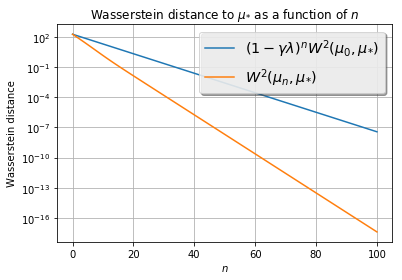

In [8]:
#Wasserstein distance

%matplotlib inline

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42


upper = plt.plot(Wass_th, label = '$(1-\gamma\lambda)^{n}W^2(\mu_0,\mu_{*})$')
true = plt.plot(Wass, label = '$W^2(\mu_n,\mu_{*})$')
#kl = plt.plot(KL, label = '$KL(\mu_n|\mu_\star)$')

legend = plt.legend(loc = 1, shadow = True, fontsize = 'x-large')
plt.title('Wasserstein distance to $\mu_{*}$ as a function of $n$')
plt.ylabel('Wasserstein distance')
plt.xlabel('$n$')
plt.grid()
plt.yscale('log')
#plt.savefig('Wass.png')

plt.show()

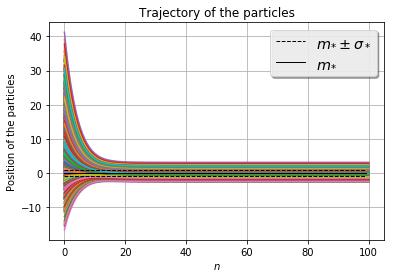

In [9]:
#Particles

%matplotlib inline

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42


particles = plt.plot(Particles)
plt.plot([[-1.0]]*niter, color = 'black', linewidth = 1.0, linestyle = '--', label = '$m_{*} \pm \sigma_*$')
plt.plot([[+1.0]]*niter, color = 'black', linewidth = 1.0, linestyle = '--')
plt.plot([[0.0]]*niter, color = 'black', linewidth = 1.0, label = '$m_{*}$')


legend = plt.legend(loc = 1, shadow = True, fontsize = 'x-large')
plt.title('Trajectory of the particles')
plt.ylabel('Position of the particles')
plt.xlabel('$n$')
plt.grid()
#plt.savefig('Particles.png')

plt.show()

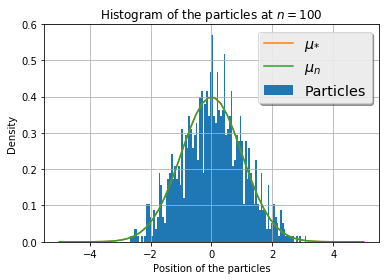

In [13]:
#Histogram of particles, t = niter

%matplotlib inline

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

t = niter

xaxis = np.linspace(-5, +5)
yax = [1/(np.sqrt(sigma2[t]*2*np.pi))*np.exp(-0.5*(x-m[t])**2/sigma2[t]) for x in xaxis]
yaxis = [1/(np.sqrt(2*np.pi))*np.exp(-0.5*x**2) for x in xaxis]

b = int(d/10)
n = str(t)

hist = plt.hist(Particles[t], bins=b, normed=1, label = 'Particles')
true = plt.plot(xaxis, yaxis, label = '$\mu_{*}$')
current = plt.plot(xaxis, yax, label = '$\mu_n$')


legend = plt.legend(loc = 1, shadow = True, fontsize = 'x-large')
plt.title('Histogram of the particles at $n =$'+n)
plt.ylabel('Density')
plt.xlabel('Position of the particles')
plt.grid()
#plt.savefig('Histogram_t_'+str(t)+'.png')

plt.show()

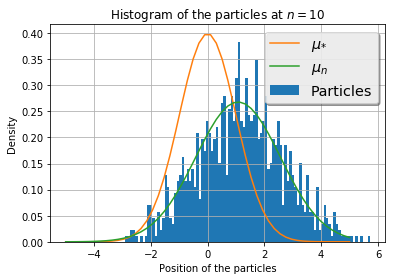

In [14]:
#Histogram of particles, t = niter/10

%matplotlib inline

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
t = int(niter/10)

xaxis = np.linspace(-5, +5)
yax = [1/(np.sqrt(sigma2[t]*2*np.pi))*np.exp(-0.5*(x-m[t])**2/sigma2[t]) for x in xaxis]
yaxis = [1/(np.sqrt(2*np.pi))*np.exp(-0.5*x**2) for x in xaxis]

b = int(d/10)
n = str(t)

hist = plt.hist(Particles[t], bins=b, normed=1, label = 'Particles')
true = plt.plot(xaxis, yaxis, label = '$\mu_{*}}$')
current = plt.plot(xaxis, yax, label = '$\mu_n$')

legend = plt.legend(loc = 1, shadow = True, fontsize = 'x-large')
plt.title('Histogram of the particles at $n =$'+n)
plt.ylabel('Density')
plt.xlabel('Position of the particles')
plt.grid()
#plt.savefig('Histogram_t_'+str(t)+'.png')

plt.show()

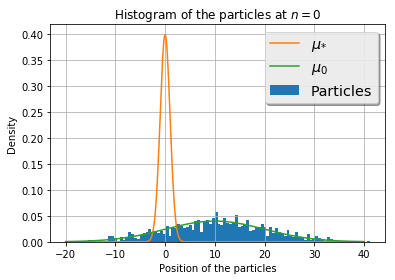

In [15]:
#Histogram of particles, t = 0

%matplotlib inline

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
t = 0

xaxis = np.linspace(-20, +40, 500)
yax = [1/(np.sqrt(sigma2[t]*2*np.pi))*np.exp(-0.5*(x-m[t])**2/sigma2[t]) for x in xaxis]
yaxis = [1/(np.sqrt(2*np.pi))*np.exp(-0.5*x**2) for x in xaxis]

b = int(d/10)
n = str(t)

hist = plt.hist(Particles[t], bins=b, normed=1, label = 'Particles')
true = plt.plot(xaxis, yaxis, label = '$\mu_{*}}$')
current = plt.plot(xaxis, yax, label = '$\mu_0$')

legend = plt.legend(loc = 1, shadow = True, fontsize = 'x-large')
plt.title('Histogram of the particles at $n =$'+n)
plt.ylabel('Density')
plt.xlabel('Position of the particles')
plt.grid()
#plt.savefig('Histogram_t_'+str(t)+'.png')

plt.show()

In [2]:
#Wasserstein distance, multidimensional setup
dim = 1000

sigma20 = 100 * np.eye(dim)
m0 = 10 * np.ones(dim)

Wass_d = [np.linalg.norm(m0)**2 + np.linalg.norm(np.eye(dim)-10*np.eye(dim))**2]
Wass_th_d = [np.linalg.norm(m0)**2 + np.linalg.norm(np.eye(dim)-10*np.eye(dim))**2]


niter = 100
mk = np.copy(m0)
sigma2k = np.copy(sigma20)
gamma = 0.2

for i in range(niter):
    mk = (1-gamma)*mk #update mean
    
    A = sigma2k
    u, V = la.eig(A)
    u = np.real_if_close(u)
    v = np.copy(u)
    sq = np.copy(u)
    for j in range(len(u)):
        C = u[j] * (1-gamma)**2
        Delta = (C + 2*gamma)**2 - 4*gamma**2
        v[j] = 0.5*(C + 2*gamma + np.sqrt(Delta))
        sq[j] = np.sqrt(v[j])
    sigma2k = np.dot(V,np.dot(np.diag(v), V.T)) #update variance
    sigmak = np.dot(V,np.dot(np.diag(sq), V.T)) 
    
    Wass_d += [np.linalg.norm(mk)**2 + np.linalg.norm(np.eye(dim)-sigmak)**2]
    Wass_th_d += [(1-gamma)*Wass_th_d[i]]
    

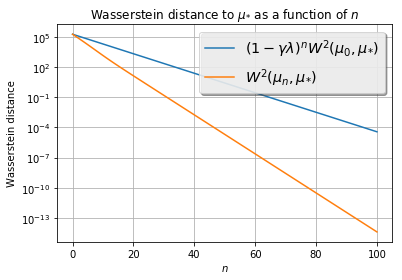

In [3]:
#Wasserstein distance

%matplotlib inline

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

upper = plt.plot(Wass_th_d, label = '$(1-\gamma\lambda)^{n}W^2(\mu_0,\mu_{*})$')
true = plt.plot(Wass_d, label = '$W^2(\mu_n,\mu_{*})$')

legend = plt.legend(loc = 1, shadow = True, fontsize = 'x-large')
plt.title('Wasserstein distance to $\mu_{*}$ as a function of $n$')
plt.ylabel('Wasserstein distance')
plt.xlabel('$n$')
plt.grid()
plt.yscale('log')
plt.savefig('Wass_d.pdf')

plt.show()